In [2060]:
import pandas as pd

insiders_df = pd.read_csv("/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/all_insiders_Atlanta.csv")
securities_df = pd.read_csv("/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/all_securities_holders_Atlanta.csv")


pd.set_option("display.max_rows", None)  # Show all rows 
pd.set_option("display.max_columns", None)  # (Optional) Show all columns
# Remove all double quotes from every cell in the DataFrame

In [2061]:
insiders_df = insiders_df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
securities_df = securities_df .applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

/var/folders/vx/xg36vz154jdcdqrx3fvxm47c0000gn/T/ipykernel_4173/420262319.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  insiders_df = insiders_df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
/var/folders/vx/xg36vz154jdcdqrx3fvxm47c0000gn/T/ipykernel_4173/420262319.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  securities_df = securities_df .applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


In [2062]:
insiders_df.head()
print(len(insiders_df))

58429


In [2063]:
insiders_df= insiders_df[insiders_df["Bank"].notna() & (insiders_df["Bank"] != "")]

#confirm no empty rows
missing_bank_rows = insiders_df[insiders_df["Bank"].isna()]
print(missing_bank_rows)


Empty DataFrame
Columns: [Bank, Internal Title, Person, External Title, Affiliation, Fiscal Year, Occupation, RSSD_ID]
Index: []


In [2064]:
securities_df.head()

,Bank,Town,Fiscal Year,Owner Name,Stock Class,Number of Shares,Percentage of Ownership,RSSD_ID
0,"1st Jackson Bancshares,Inc.","Hollywood,AL",2016,Jimmy D. Blevins,NaN,16285,14.51%,2306993
1,"1st Jackson Bancshares,Inc.","Stevenson,AL",2016,Shelby Carr,NaN,7548,6.73%,2306993
2,"1st Jackson Bancshares,Inc.","Bridgeport,AL",2016,Charles Robert Holder,NaN,11681,10.41%,2306993
3,"1st Jackson Bancshares,Inc.","Scottsboro,AL",2016,James S. McGinty,NaN,9637,8.59%,2306993
4,"1st Jackson Bancshares,Inc.","Monteagle,TN",2016,Jim Myers,NaN,11891,10.59%,2306993


In [2065]:
import os
output_folder = "notebooks"
os.makedirs(output_folder, exist_ok=True)

# Save the CSVs into the 'notebooks' folder
insiders_df.to_csv(os.path.join(output_folder, "cleaned_insiders_Atlanta.csv"), index=False)
securities_df.to_csv(os.path.join(output_folder, "cleaned_securities_Atlanta.csv"), index=False)


Identify Unique Values in Securies Table for Cleaning (Atlanta Data)

In [2066]:
##unique values of Stock Class

unique_stock_classes = sorted(securities_df["Stock Class"].dropna().unique(), key=lambda x: str(x).lower())
for val in unique_stock_classes:
    print(repr(val))


'# of Common'
'$1.00 PAR VALUE COMMON'
'(son),common stock'
',common stock'
',n/a'
'.13% Common Stock'
'.31% Common Stock'
'1.30% Options'
'108 or 9.4%'
'1996,n/a'
'2002,n/a'
'2008 And any amendment thereto,n/a'
'2010,Common Stock'
'2014'
'2016'
'2018'
'2021'
'2023'
'4.29% Common Stock'
'5.74% Common Capital'
'500 Shares PSB Bancshares,Inc.'
'59% common stock'
'6.75% Common Stock'
'8% Common Stock'
'8.25% common stock'
'9.64% common stock'
'\\$1.00 PAR VALUE COMMON'
'ADM Family Ltd.'
'AGGREGATE'
'All Common Stock'
'all voting securities'
'and affiliates,n/a'
'and Fortress Partners Banc Ventures II'
'and Raymond Patout'
'As of December 31'
'as Trustee,n/a'
'Banc Fund VIII LP'
'Bouck Trust'
'Brad Canada 2020 Trust'
'Brad Canada Individually'
'Brandon Adams'
'Breck Red LLC'
'Bryan M. Adams'
'BSJ Bankshares,Inc.'
'capital stock of P&C Bank Shares,Inc.'
'Carl R. Pennington Jr. P.A.'
'Catherine Wells Brinley Trust,Common Stock'
'CBOS Bankshares ESOP (w/401K Prov)'
'Child'
"Children's Trust,n

In [2067]:
## find unique values of Number of Shares

unique_number_of_shares_ = sorted(securities_df["Number of Shares"].dropna().unique(), key=lambda x: str(x).lower())
for val in unique_number_of_shares_:
    print(repr(val))


'#10671.20'
'#112.20'
'#11980.50'
'#13790.00'
'#2020.00'
'#2040.00'
'#2060.12'
'#212.52'
'#257.36'
'#5223.40'
'#5480.40'
'#5716.00'
'#65379.01'
'#70240.15'
'#84044.67'
'#94715.87'
'#9893.10'
'& Restricted Shares on Common Stock,215871'
'& Restricted Shares on Common Stock,219555'
'& Restricted Shares,198155'
'& Restricted Shares,206726'
'0'
'0.00'
'0.0000'
'0.0022'
'0.01%'
'0.0115'
'0.03%'
'0.0563'
'0.37%'
'0.43%'
'0.9222'
'0.9555'
'1'
'1,027'
'1,043'
'1,223'
'1,228'
'1,296'
'1,312'
'1,978.90'
'1.3833'
'1.47'
'1.9112'
'1.9167'
'1.9222'
'1/3'
'10'
'10.00'
'10.00000'
'100'
'100%'
'100,142'
'100.00'
'100.2'
'1000'
'1000.0000'
'10000'
'10000.00'
'100000'
'1000000'
'10002258'
'100027'
'10007'
'1001'
'100133'
'100142'
'10019'
'100194'
'10025000'
'10036'
'100393'
'100433'
'1005.00'
'10050'
'1005011'
'10052'
'1005593'
'1006'
'1006.25'
'1006155'
'100639'
'10077'
'10077.96'
'10078'
'100834.187'
'100847'
'100848'
'10091'
'10096'
'101'
'101,204'
'101002'
'101045'
'1011013'
'10111.50'
'10112'
'1011

In [2068]:
## find unique values of Percentage of Ownership
unique_percentage_of_ownership_ = sorted(securities_df["Percentage of Ownership"].dropna().unique(), key=lambda x: str(x).lower())
for val in unique_percentage_of_ownership_:
    print(repr(val))


'.002616%'
'.01%'
'.04%'
'.05%'
'.06%'
'.1%'
'.10%'
'.11%'
'.12%'
'.13%'
'.14%'
'.16%'
'.18%'
'.22%'
'.24%'
'.25%'
'.26%'
'.27%'
'.28%'
'.29%'
'.30%'
'.31%'
'.363%'
'.37%'
'.39%'
'.4'
'.4%'
'.44%'
'.45%'
'.51%'
'.53%'
'.54%'
'.58%'
'.59%'
'.6100%'
'.63%'
'.6302%'
'.71%'
'.74%'
'.75%'
'.81%'
'.82%'
'.92%'
'.93%'
'.94%'
'.97%'
'0'
'0%'
'0.0%'
'0.00'
'0.00%'
'0.0000%'
'0.0008%'
'0.001%'
'0.0015%'
'0.002%'
'0.003%'
'0.0032%'
'0.004%'
'0.0049%'
'0.005%'
'0.0050%'
'0.006%'
'0.0060%'
'0.0067%'
'0.00699%'
'0.007%'
'0.009%'
'0.01%'
'0.011%'
'0.0124%'
'0.0125%'
'0.013%'
'0.0141%'
'0.0158%'
'0.0162%'
'0.0166%'
'0.017%'
'0.0170%'
'0.02%'
'0.020%'
'0.022%'
'0.027%'
'0.028%'
'0.03%'
'0.031%'
'0.0317%'
'0.0318%'
'0.0326%'
'0.033%'
'0.0381%'
'0.04%'
'0.040%'
'0.043%'
'0.044%'
'0.046%'
'0.048%'
'0.0484%'
'0.0486%'
'0.0497%'
'0.05%'
'0.053%'
'0.06%'
'0.060%'
'0.061%'
'0.07'
'0.07%'
'0.076%'
'0.078%'
'0.08%'
'0.084%'
'0.09'
'0.09%'
'0.091%'
'0.0917%'
'0.094%'
'0.095%'
'0.098%'
'0.1%'
'0.10%'
'0.100%'
'0.

Identify Unique Values in Insiders Table for cleaning (Atlanta Data)

In [2069]:
## find unique values of Fiscal Year in insiders table
unique_FiscalYearInsiders_ = sorted(insiders_df["Fiscal Year"].dropna().unique(), key=lambda x: str(x).lower())
for val in unique_FiscalYearInsiders_:
    print(repr(val))



'& Batchelor'
'& Bible,2014'
'& Bible,2015'
'& Bible,2016'
'& Boggs Law Firm,2014'
'& Boggs Law Firm,2015'
'& Boggs Law Firm,2018'
'& Boggs Law Firm,2019'
'& Brakefield,2016'
'& Brakefield,2017'
'& Brakefield,2018'
'& Brakefield,2021'
'& Brakefield,2022'
'& Brakefield,2023'
'& Chairman,Latt Maxcy Corporation'
'& Crenshaw'
'& Fertilizer'
'& Francis Partnership,2014'
'& Griffin'
'& Ingram'
'& Irvin'
'& Irvin,2015'
'& Irvin,2016'
'& Irvin,2017'
'& Irvin,2018'
'& Ketterman,2014'
'& Laura Jent,2020'
'& Mitchell,2018'
'& Mitchell,2019'
'& Mitchell,2020'
'& Mitchell,2021'
'& Nobile,2015'
'& Nobile,2017'
'& Pourciau'
'& Proctor,2019'
'& Reid,2020'
'& Smith,2014'
'& Stapleton,2014'
'& Treasurer,Security Federal Savings Bank (SFSB)'
'& Webb,2014'
'& Welch PLLC,2016'
'& Welch PLLC,2017'
'& Wilson,2015'
'& Wilson,2016'
'& Wilson,2017'
'& Wilson,2018'
'& Wilson,2019'
',2014'
',2015'
',2016'
',2018'
',2023'
'100'
'11508'
'116420'
'12/31/2021'
'12/31/2022'
'12/31/2023'
'12/31/22'
'12/31/24'
'122'
'12

### Test Data for S&P 

In [2070]:
cleaned_insiders_df_S3 = pd.read_csv("/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/all_insiders_s3.csv")
cleaned_securities_df_S3 = pd.read_csv("/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/all_securities_holders_s3.csv")

cleaned_insiders_df_S3.to_csv(
    os.path.join(output_folder, "cleaned_insiders_df_S3.csv"),
    index=False
)

cleaned_securities_df_S3.to_csv(
    os.path.join(output_folder, "cleaned_securities_df_S3.csv"),
    index=False
)


Inspect Data for Cleaning

In [2071]:
insiders_df.head(5)

,Bank,Internal Title,Person,External Title,Affiliation,Fiscal Year,Occupation,RSSD_ID
0,"1st Jackson Bancshares,Inc.",Chairman/Pres,Jimmy D. Blevins,President/CEO Director Chairman,NaN,2016,NaN,2306993
1,"1st Jackson Bancshares,Inc.",Director,Shelby Carr,Director,Carr Farm,2016,Farmer,2306993
2,"1st Jackson Bancshares,Inc.",Director,Billy Duck,Director,NaN,2016,Retired-Insurance,2306993
3,"1st Jackson Bancshares,Inc.",Director Emeritus,James S. McGinty,NaN,"Dawson,McGinty & Parker",2016,Attorney,2306993
4,"1st Jackson Bancshares,Inc.",Director/ Secretary,Pam M. Parker,Director/ Secretary,"Dawson,McGinty & Parker",2016,Attorney,2306993


In [2072]:
securities_df.head()

,Bank,Town,Fiscal Year,Owner Name,Stock Class,Number of Shares,Percentage of Ownership,RSSD_ID
0,"1st Jackson Bancshares,Inc.","Hollywood,AL",2016,Jimmy D. Blevins,NaN,16285,14.51%,2306993
1,"1st Jackson Bancshares,Inc.","Stevenson,AL",2016,Shelby Carr,NaN,7548,6.73%,2306993
2,"1st Jackson Bancshares,Inc.","Bridgeport,AL",2016,Charles Robert Holder,NaN,11681,10.41%,2306993
3,"1st Jackson Bancshares,Inc.","Scottsboro,AL",2016,James S. McGinty,NaN,9637,8.59%,2306993
4,"1st Jackson Bancshares,Inc.","Monteagle,TN",2016,Jim Myers,NaN,11891,10.59%,2306993


In [2073]:
## find unique values of Fiscal Year in insiders table
unique_FiscalYearInsiders_ = sorted(insiders_df["Fiscal Year"].dropna().unique(), key=lambda x: str(x).lower())
for val in unique_FiscalYearInsiders_:
    print(repr(val))


'& Batchelor'
'& Bible,2014'
'& Bible,2015'
'& Bible,2016'
'& Boggs Law Firm,2014'
'& Boggs Law Firm,2015'
'& Boggs Law Firm,2018'
'& Boggs Law Firm,2019'
'& Brakefield,2016'
'& Brakefield,2017'
'& Brakefield,2018'
'& Brakefield,2021'
'& Brakefield,2022'
'& Brakefield,2023'
'& Chairman,Latt Maxcy Corporation'
'& Crenshaw'
'& Fertilizer'
'& Francis Partnership,2014'
'& Griffin'
'& Ingram'
'& Irvin'
'& Irvin,2015'
'& Irvin,2016'
'& Irvin,2017'
'& Irvin,2018'
'& Ketterman,2014'
'& Laura Jent,2020'
'& Mitchell,2018'
'& Mitchell,2019'
'& Mitchell,2020'
'& Mitchell,2021'
'& Nobile,2015'
'& Nobile,2017'
'& Pourciau'
'& Proctor,2019'
'& Reid,2020'
'& Smith,2014'
'& Stapleton,2014'
'& Treasurer,Security Federal Savings Bank (SFSB)'
'& Webb,2014'
'& Welch PLLC,2016'
'& Welch PLLC,2017'
'& Wilson,2015'
'& Wilson,2016'
'& Wilson,2017'
'& Wilson,2018'
'& Wilson,2019'
',2014'
',2015'
',2016'
',2018'
',2023'
'100'
'11508'
'116420'
'12/31/2021'
'12/31/2022'
'12/31/2023'
'12/31/22'
'12/31/24'
'122'
'12

In [2074]:
print(len(unique_FiscalYearInsiders_))

682


In [2075]:
##Find unique values that do not include the valid years from range 2014-2024

# Step 1: Create a list of valid fiscal years to exclude
years_to_exclude = [str(year) for year in range(2014, 2024)]  # 2014 to 2023 inclusive

# Step 2: Filter rows where 'Fiscal Year' is NOT one of those clean years
mask = ~insiders_df["Fiscal Year"].astype(str).isin(years_to_exclude)

# Step 3: Extract the Fiscal Year and Affiliation columns for those "weird" values
weird_fy_affiliations_df = (
    insiders_df.loc[mask, ["Fiscal Year", "Affiliation"]]
    .dropna(subset=["Fiscal Year"])
    .drop_duplicates()
    .sort_values(by="Fiscal Year")
)

# Step 4: View or return the DataFrame
weird_fy_affiliations_df.head()
print(len(weird_fy_affiliations_df))



1167


In [2076]:
import re

# Define the pattern to capture names like & Bible,2015
pattern = r"^& (.+),\s*(20\d{2})$"

# Function to apply to each row
def clean_fiscal_year_and_affiliation(row):
    fiscal_year_value = str(row["Fiscal Year"])
    match = re.match(pattern, fiscal_year_value)
    
    if match:
        extra_affiliation = match.group(1)  # e.g. "Bible"
        year = match.group(2)              # e.g. "2015"
        
        # Append to existing affiliation
        updated_affiliation = f"{row['Affiliation']} & {extra_affiliation}"
        return pd.Series([updated_affiliation, year])
    
    # If it doesn't match, return the original values
    return pd.Series([row["Affiliation"], row["Fiscal Year"]])

# Apply row-wise
insiders_df[["Affiliation", "Fiscal Year"]] = insiders_df.apply(
    clean_fiscal_year_and_affiliation,
    axis=1
)

print(len(insiders_df))

58388


In [2077]:
# Step 1: Define the valid year range to exclude
years_to_exclude = [str(year) for year in range(2014, 2024)]  # 2014 to 2023 inclusive

# Step 2: Filter out rows where Fiscal Year is not in the valid range
mask = ~insiders_df["Fiscal Year"].astype(str).isin(years_to_exclude)

# Step 3: Select and deduplicate the "weird" Fiscal Year + cleaned Affiliation
weird_fy_affiliations_df = (
    insiders_df.loc[mask, [ "Bank", "Internal Title", "Person", "External Title", "Affiliation", "Fiscal Year","Occupation"]]
    .dropna(subset=["Fiscal Year"])
    .drop_duplicates()
    .sort_values(by="Fiscal Year")
)

# Step 4: Display the result
weird_fy_affiliations_df
print(len(weird_fy_affiliations_df))


1487


Clean Data

In [2078]:

######CLEANING#######
#################
def clean_occupation_and_append_year(row):
    occ = row['Occupation']
    fy = row['Fiscal Year']

    # Skip rows where Occupation is missing
    if pd.isna(occ):
        return row

    occ_str = str(occ).replace('\n', ' ')
    fy_str = '' if pd.isna(fy) else str(fy)

    # Find all 4-digit years starting with 19 or 20
    full_years = re.findall(r'\b((?:19|20)\d{2})\b', occ_str)

    for year in full_years:
        occ_str = re.sub(rf'\b{year}\b', '', occ_str)
        fy_str += f' {year}'

    # Clean up extra whitespace
    occ_str = re.sub(r'\s+', ' ', occ_str).strip()
    fy_str = fy_str.strip()

    row['Occupation'] = occ_str
    row['Fiscal Year'] = fy_str
    return row


insiders_df = insiders_df.apply(clean_occupation_and_append_year, axis=1)
print(len(insiders_df))


58388


In [2079]:
######CLEANING#######
#################

def separate_nonyear_from_fy(row):
    fy = row['Fiscal Year']
    aff = row['Affiliation']

    # Skip if Fiscal Year is empty
    if pd.isna(fy):
        return row

    fy_str = str(fy)
    aff_str = '' if pd.isna(aff) else str(aff)

    # Find 4-digit years and keep them
    years = re.findall(r'\b(?:19|20)\d{2}\b', fy_str)
    year_part = ' '.join(years)

    # Find non-year content
    non_year_part = re.sub(r'\b(?:19|20)\d{2}\b', '', fy_str)
    non_year_part = re.sub(r'\s+', ' ', non_year_part).strip()

    # Append non-year content to Affiliation if present
    if non_year_part:
        aff_str += f' {non_year_part}'

    # Final assignment
    row['Fiscal Year'] = (year_part + ' ' if year_part else '') + ''
    row['Affiliation'] = aff_str.strip()
    return row

# Apply to the DataFrame
insiders_df = insiders_df.apply(separate_nonyear_from_fy, axis=1)
print(len(insiders_df))


58388


In [2080]:
######CLEANING#######
#################
# Drop rows where 'Common Stock' appears in the Affiliation column
#drop rows where 
insider_df = insiders_df[~insiders_df['Affiliation'].str.contains('Common Stock', case=False, na=False)]
insiders_df  = insiders_df[~insiders_df['Occupation'].str.contains('%', case=False, na=False)]


In [2081]:
######CLEANING#######
#################

# List of titles to match exactly (ignoring leading/trailing spaces)
titles_to_move = [
    "Director & Chairman",
    "President & Treasurer",
    "Director",
    "President",
    "Chairman",
    "Vice President",
    "Chairman & CEO and Director",
    "Director & Secratary",
    "& CEO",
    "and President",
    "PA",
    "CEO",
    "Vice-President",
    "Operating Manager",
    "Vice President"
]

# Escape and join them as regex alternation, making sure to match as whole phrases
title_pattern = '|'.join(re.escape(title.strip()) for title in titles_to_move)

def move_titles_to_external(row):
    aff = str(row['Affiliation']) if pd.notna(row['Affiliation']) else ''
    ext = str(row['External Title']) if pd.notna(row['External Title']) else ''

    # Find all matching titles in affiliation
    found_titles = re.findall(rf'\b(?:{title_pattern})\b', aff)

    if found_titles:
        # Remove each found title from affiliation
        for title in found_titles:
            aff = aff.replace(title, '')

        # Clean extra whitespace
        aff = re.sub(r'\s+', ' ', aff).strip()

        # Append titles to External Title column
        ext += ' ' + ' '.join(found_titles)
        ext = re.sub(r'\s+', ' ', ext).strip()

        row['Affiliation'] = aff
        row['External Title'] = ext

    return row

# Apply to your DataFrame
insiders_df = insiders_df.apply(move_titles_to_external, axis=1)


In [2082]:
######CLEANING#######
#################

def clean_row(row):
    # Clean Person → move year to Fiscal Year
    person = str(row['Person']) if pd.notna(row['Person']) else ''
    fy = str(row['Fiscal Year']) if pd.notna(row['Fiscal Year']) else ''
    aff = str(row['Affiliation']) if pd.notna(row['Affiliation']) else ''
    internal = str(row['Internal Title']) if pd.notna(row['Internal Title']) else ''

    # Move 4-digit year(s) from Person to Fiscal Year
    person_years = re.findall(r'\b((?:19|20)\d{2})\b', person)
    if person_years:
        for year in person_years:
            fy += f' {year}'
            person = person.replace(year, '')
        person = re.sub(r'\s+', ' ', person).strip()
        fy = fy.strip()

    # Move "South Louisiana Bank" from Fiscal Year to Affiliation
    if 'South Louisiana Bank' in fy:
        fy = fy.replace('South Louisiana Bank', '')
        aff += ' South Louisiana Bank'
        fy = fy.strip()
        aff = re.sub(r'\s+', ' ', aff).strip()

    # Remove "Houma,LA" from Internal Title
    internal = internal.replace('Houma,LA', '').strip()
    internal = re.sub(r'\s+', ' ', internal).strip()

    # Assign back
    row['Person'] = person
    row['Fiscal Year'] = fy
    row['Affiliation'] = aff
    row['Internal Title'] = internal

    return row

# Apply the function to your DataFrame
insiders_df = insiders_df.apply(clean_row, axis=1)


In [2083]:
print(list(insiders_df.columns))
print(list(securities_df.columns))


['Bank', 'Internal Title', 'Person', 'External Title', 'Affiliation', 'Fiscal Year', 'Occupation', 'RSSD_ID']
['Bank', 'Town', 'Fiscal Year', 'Owner Name', 'Stock Class', 'Number of Shares', 'Percentage of Ownership', 'RSSD_ID']


In [2084]:
securities_df['Owner Name'] = securities_df['Owner Name'].str.lower().str.strip()
insiders_df['Person'] = insiders_df['Person'].str.lower().str.strip()

print(len(insiders_df))
print(len(securities_df))

58226
14722


Merge Insiders and Securites Holder Tables together


In [2085]:
# Clean up Fiscal Year and name columns

# Strip spaces and remove commas from Fiscal Year columns
insiders_df['Fiscal Year'] = insiders_df['Fiscal Year'].astype(str).str.replace(',', '').str.strip()
securities_df['Fiscal Year'] = securities_df['Fiscal Year'].astype(str).str.replace(',', '').str.strip()

# Clean name columns
insiders_df['Person'] = insiders_df['Person'].astype(str).str.strip()
securities_df['Owner Name'] = securities_df['Owner Name'].astype(str).str.strip()

# Merge on Person ↔ Owner Name and Fiscal Year
merged_df = pd.merge(
    insiders_df,
    securities_df,
    left_on=['Person', 'Fiscal Year'],
    right_on=['Owner Name', 'Fiscal Year'],
    how='inner'
)

# Drop unnecessary columns
merged_df.drop(columns=['Town', 'Occupation', 'Affiliation', 'External Title', 'Owner Name'], inplace=True, errors='ignore')

# Optional renaming for clarity
merged_df.rename(columns={
    'Bank_x': 'Bank',
    'RSSD_ID_x': 'RSSD_ID',
}, inplace=True)

merged_df.drop(columns=['Bank_y', 'RSSD_ID_y'], inplace=True, errors='ignore')

# Optional: reset index
merged_df.reset_index(drop=True, inplace=True)


In [2086]:
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)


In [2087]:
print(len(merged_df))

5672


In [2088]:
merged_df.head(5)

,Bank,Internal Title,Person,Fiscal Year,RSSD_ID,Stock Class,Number of Shares,Percentage of Ownership
0,"1st Jackson Bancshares,Inc.",Chairman/Pres,jimmy d. blevins,2016,2306993,NaN,16285,14.51%
1,"1st Jackson Bancshares,Inc.",Director,shelby carr,2016,2306993,NaN,7548,6.73%
2,"1st Jackson Bancshares,Inc.",Director Emeritus,james s. mcginty,2016,2306993,NaN,9637,8.59%
3,"1st Jackson Bancshares,Inc.",Director/ Vice Chairman,jim myers,2016,2306993,NaN,11891,10.59%
4,"1st Jackson Bancshares,Inc.",Chairman/Pres Director,jimmy d. blevins,2017,NaN,NaN,16531,14.73%


In [2089]:
# Try to convert to numeric (after removing %), mark errors as NaN
cleaned_percent = (
    merged_df['Percentage of Ownership']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)

# Keep only rows where conversion is successful (i.e., not NaN after coercion)
is_valid = pd.to_numeric(cleaned_percent, errors='coerce').notna()
merged_df = merged_df[is_valid].copy()

# Now convert and scale to decimal
merged_df['Percentage of Ownership'] = pd.to_numeric(cleaned_percent[is_valid]) / 100



In [2090]:
print(merged_df['Percentage of Ownership'].dtype) 

float64


In [2091]:
merged_df['Fiscal Year'] = (
    merged_df['Fiscal Year']
    .str.replace(',', '', regex=False)
    .astype(int)
)


In [2092]:
print(merged_df['Fiscal Year'].dtype)   

int64


Data Analysis Pt 1

What is the average fraction of company ownership accounted for in the securities data each year?

In [2093]:

import matplotlib.pyplot as plt

# Step 1: Sum ownership per bank per year
bank_year_ownership = (
    merged_df
    .groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Step 2: Now compute average, median, p25, and p75 across banks for each year
ownership_summary = (
    bank_year_ownership
    .groupby('Fiscal Year')['Total Reported Ownership']
    .agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    .rename(columns={'mean': 'Average', 'median': 'Median', '<lambda_0>': 'P25', '<lambda_1>': 'P75'})
    .reset_index()
)


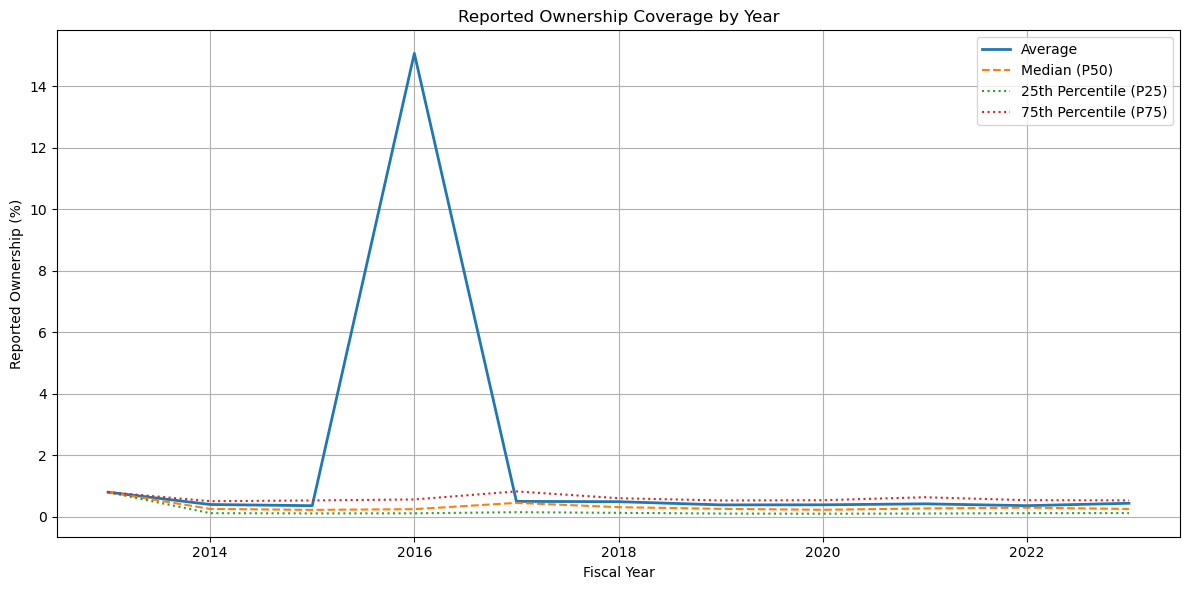

In [2094]:
plt.figure(figsize=(12,6))

# Plot lines
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['Average'], label='Average', linewidth=2)
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['Median'], label='Median (P50)', linestyle='--')
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['P25'], label='25th Percentile (P25)', linestyle=':')
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['P75'], label='75th Percentile (P75)', linestyle=':')

plt.xlabel('Fiscal Year')
plt.ylabel('Reported Ownership (%)')
plt.title('Reported Ownership Coverage by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What is the median fraction of the company's ownership that is accounted for by rows in the securities table, at every year? What is the 25th, 75th percentile?

In [2095]:
# If not already done, compute ownership totals per bank per year
bank_year_ownership = (
    merged_df
    .groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Compute percentiles per year
ownership_percentiles = (
    bank_year_ownership
    .groupby('Fiscal Year')['Total Reported Ownership']
    .agg([
        ('P25', lambda x: x.quantile(0.25)),
        ('P50', 'median'),
        ('P75', lambda x: x.quantile(0.75))
    ])
    .reset_index()
)


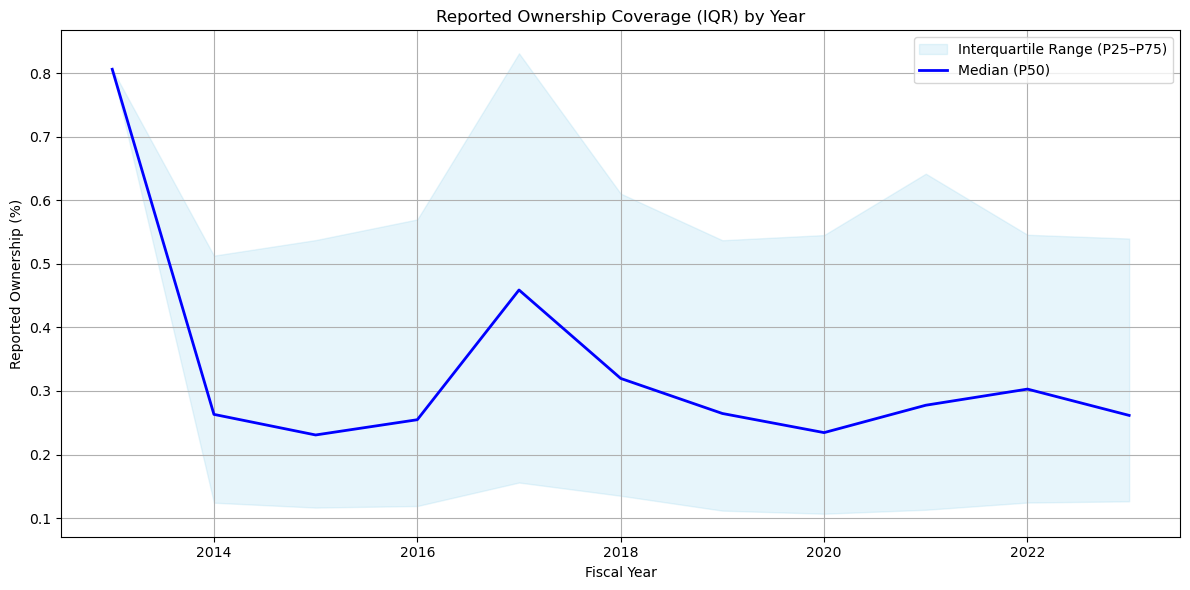

In [2096]:
plt.figure(figsize=(12, 6))

# Ribbon
plt.fill_between(
    ownership_percentiles['Fiscal Year'],
    ownership_percentiles['P25'],
    ownership_percentiles['P75'],
    alpha=0.2,
    color='skyblue',
    label='Interquartile Range (P25–P75)'
)

# Lines
plt.plot(ownership_percentiles['Fiscal Year'], ownership_percentiles['P50'], label='Median (P50)', color='blue', linewidth=2)

plt.xlabel('Fiscal Year')
plt.ylabel('Reported Ownership (%)')
plt.title('Reported Ownership Coverage (IQR) by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What is the p25, p50, p75 number of observations per bank in the Atlanta Fed data?

In [2097]:
# Step 1: Count how many unique years each bank appears in
years_per_bank = (
    merged_df.groupby('Bank')['Fiscal Year']
    .nunique()
    .reset_index(name='Years Reported')
)

# Step 2: Summary statistics
bank_year_summary = years_per_bank['Years Reported'].describe(percentiles=[0.25, 0.5, 0.75])
print(bank_year_summary[['25%', '50%', '75%']])


25%    1.0
50%    2.0
75%    3.0
Name: Years Reported, dtype: float64


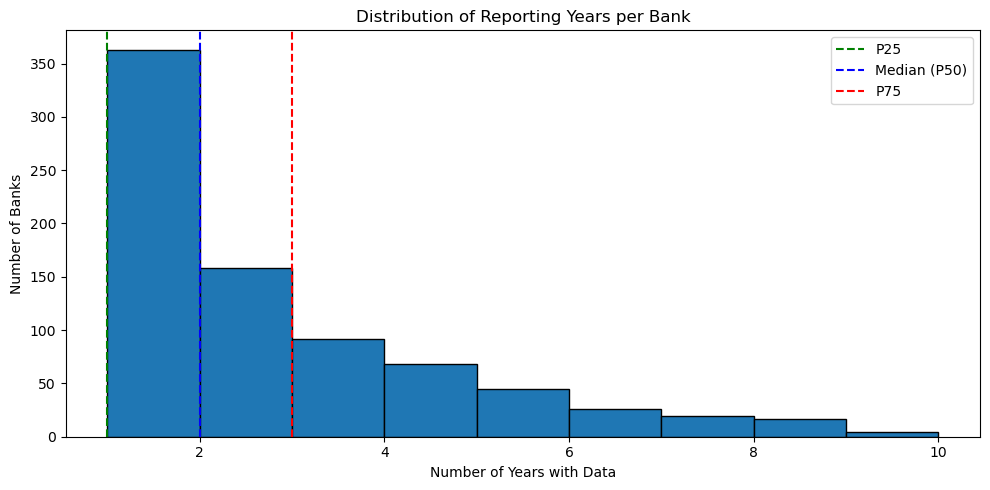

In [2098]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(years_per_bank['Years Reported'], bins=range(1, years_per_bank['Years Reported'].max()+2), edgecolor='black')
plt.axvline(bank_year_summary['25%'], color='green', linestyle='--', label='P25')
plt.axvline(bank_year_summary['50%'], color='blue', linestyle='--', label='Median (P50)')
plt.axvline(bank_year_summary['75%'], color='red', linestyle='--', label='P75')

plt.xlabel('Number of Years with Data')
plt.ylabel('Number of Banks')
plt.title('Distribution of Reporting Years per Bank')
plt.legend()
plt.tight_layout()
plt.show()


What % of the bank does the CEO own at every year?

In [2099]:
ceo_df = merged_df[
    merged_df['Internal Title'].str.contains(r'ceo|chief executive officer', case=False, na=False)
]

# Sum CEO ownership per bank per year
ceo_ownership = (
    ceo_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='CEO Ownership')
)


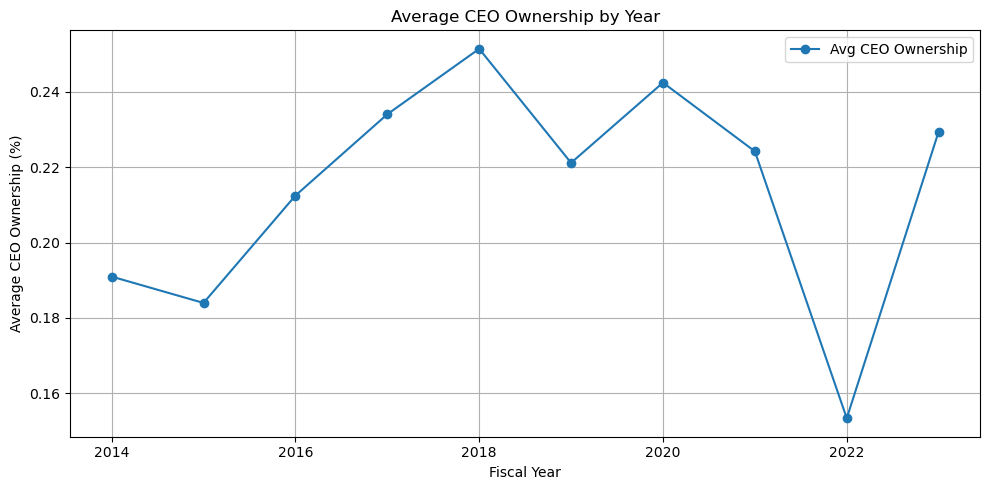

In [2100]:
# Average CEO ownership across all banks each year
avg_ceo_ownership = (
    ceo_ownership.groupby('Fiscal Year')['CEO Ownership']
    .mean()
    .reset_index()
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(avg_ceo_ownership['Fiscal Year'], avg_ceo_ownership['CEO Ownership'], marker='o', label='Avg CEO Ownership')
plt.xlabel('Fiscal Year')
plt.ylabel('Average CEO Ownership (%)')
plt.title('Average CEO Ownership by Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What % of the bank does the CEO own, as a fraction of the "reported" company ownership?

In [2101]:
# Step 1: Total reported ownership per bank-year
reported_ownership = (
    merged_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Step 2: CEO ownership per bank-year (reuse or recalculate if needed)
ceo_df = merged_df[
    merged_df['Internal Title'].str.contains(r'ceo|chief executive officer', case=False, na=False)
]

ceo_ownership = (
    ceo_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='CEO Ownership')
)

# Step 3: Merge the two
ownership_combined = pd.merge(
    reported_ownership,
    ceo_ownership,
    on=['Bank', 'Fiscal Year'],
    how='left'
)

# Fill missing CEO ownership with 0 (if a bank had no CEO listed that year)
ownership_combined['CEO Ownership'] = ownership_combined['CEO Ownership'].fillna(0)

# Step 4: Compute CEO share of reported ownership
ownership_combined['CEO Share of Reported'] = (
    ownership_combined['CEO Ownership'] / ownership_combined['Total Reported Ownership']
)

# Step 5: Optional preview
ownership_combined.head()


,Bank,Fiscal Year,Total Reported Ownership,CEO Ownership,CEO Share of Reported
0,"1st Jackson Bancshare,Inc.",2022,0.5979,0.0,0.0
1,"1st Jackson Bancshares,Inc.",2014,0.4334,0.0,0.0
2,"1st Jackson Bancshares,Inc.",2016,0.4042,0.0,0.0
3,"1st Jackson Bancshares,Inc.",2017,0.4066,0.0,0.0
4,"1st Jackson Bancshares,Inc.",2019,0.3467,0.0,0.0


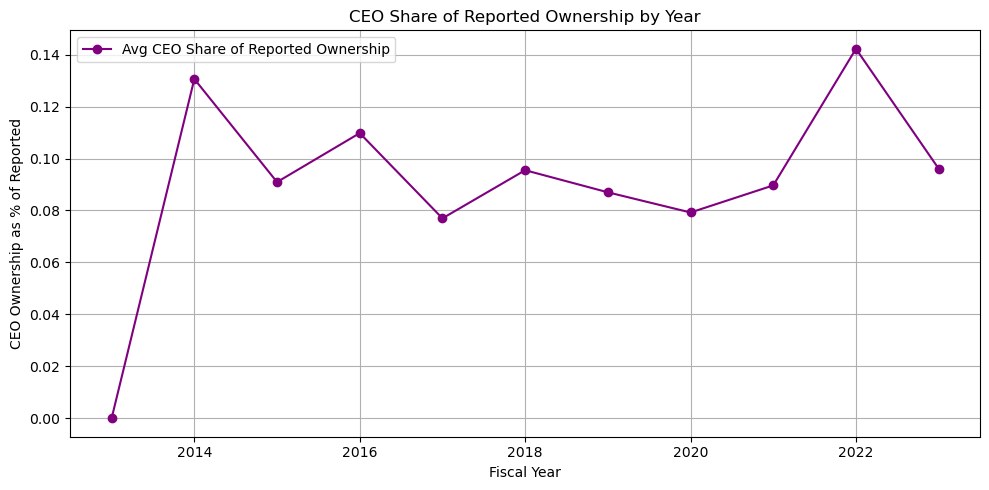

In [2102]:
avg_ceo_share = (
    ownership_combined.groupby('Fiscal Year')['CEO Share of Reported']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(avg_ceo_share['Fiscal Year'], avg_ceo_share['CEO Share of Reported'], marker='o', color='purple', label='Avg CEO Share of Reported Ownership')
plt.xlabel('Fiscal Year')
plt.ylabel('CEO Ownership as % of Reported')
plt.title('CEO Share of Reported Ownership by Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [2103]:
merged_df.to_csv(os.path.join(output_folder, "merged_df_Atlanta.csv"), index=False)

Preliminary Analysis Pt 2

Normalize the Bank names

In [2104]:
# Clean percentage
cleaned_percent = (
    securities_df['Percentage of Ownership']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)

# Filter valid percentages
is_valid = pd.to_numeric(cleaned_percent, errors='coerce').notna()
securities_df = securities_df[is_valid].copy()
securities_df['Percentage of Ownership'] = pd.to_numeric(cleaned_percent[is_valid]) / 100

# Convert Fiscal Year from date string to int year
securities_df['Fiscal Year'] = pd.to_datetime(securities_df['Fiscal Year'], errors='coerce').dt.year
securities_df = securities_df.dropna(subset=['Fiscal Year'])
securities_df['Fiscal Year'] = securities_df['Fiscal Year'].astype(int)


In [2105]:
securities_df['Bank'] = (
    securities_df['Bank']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
)


In [2106]:
from fuzzywuzzy import process, fuzz

# Step 1: Get banks with only 1–2 years of data
years_per_bank = securities_df.groupby('Bank')['Fiscal Year'].nunique()
limited_banks = years_per_bank[years_per_bank <= 2]

# Step 2: Get the full list of cleaned bank names
unique_banks = securities_df['Bank'].unique()

# Step 3: Loop and print top 5 matches per limited bank
print(f"Number of banks with only 1–2 years of data: {len(limited_banks)}\n")
print("Top 5 fuzzy matches for each bank:\n")

for bank in limited_banks.index:
    matches = process.extract(bank, unique_banks, scorer=fuzz.token_sort_ratio, limit=5)
    
    print(f"\n🔍 Original: {bank}")
    for match_name, score in matches:
        print(f"   - {match_name}  →  score: {score}")


Number of banks with only 1–2 years of data: 356

Top 5 fuzzy matches for each bank:


🔍 Original: 1st jackson bancshareinc
   - 1st jackson bancshareinc  →  score: 100
   - 1st jackson bancsharesinc  →  score: 98
   - dawson bancsharesinc  →  score: 77
   - cnb bancsharesinc  →  score: 73
   - edison bancsharesinc  →  score: 73

🔍 Original: a wilberts sons lumber and shingle company
   - a wilberts sons lumber and shingle company  →  score: 100
   - washingtonwilkes holding company  →  score: 59
   - wilson bank holding company  →  score: 58
   - plaquemine bank  trust company  →  score: 56
   - suntrust bank holding company  →  score: 56

🔍 Original: abh bancorpinc
   - abh bancorpinc  →  score: 100
   - anchor bancorpinc  →  score: 84
   - homebancorpinc  →  score: 79
   - american bancorpinc  →  score: 73
   - cnb bancorpinc  →  score: 71

🔍 Original: alamerica banccorp
   - alamerica banccorp  →  score: 100
   - alamerica banccorpinc  →  score: 92
   - american bancorpinc  →  scor

In [2107]:

# 2. Define the bank you're investigating
target_name = "1st jackson bancshareinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name

In [2108]:

# 2. Define the bank you're investigating
target_name = "alamerica banccorp"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 92]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2109]:

# 2. Define the bank you're investigating
target_name = "alapaha"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 47]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2110]:

# 2. Define the bank you're investigating
target_name = "anb holddingsinc"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 93]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2111]:
# 2. Define the bank you're investigating
target_name = "andrew johnson bancsharesinc"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 77]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2112]:

# 2. Define the bank you're investigating
target_name = "atlanticnational corporation"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 70]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2113]:
# 2. Define the bank you're investigating
target_name = "auburn national bancorporation"

# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 95]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2114]:

# 2. Define the bank you're investigating
target_name = "valley bancsharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2115]:


# 2. Define the bank you're investigating
target_name = "united tennessee banksharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2116]:

# 2. Define the bank you're investigating
target_name = "union bank shares inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 78]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2117]:

# 2. Define the bank you're investigating
target_name = "touchmark bancshares inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2118]:
# 2. Define the bank you're investigating
target_name = "tombigbee bancshares inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2119]:

# 2. Define the bank you're investigating
target_name = "thread bancorp inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 97]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2120]:

# 2. Define the bank you're investigating
target_name = "the nashville holding company"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 95]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2121]:

# 2. Define the bank you're investigating
target_name = "sunsouth bancshares"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 93]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2122]:
# 2. Define the bank you're investigating
target_name = "st hldgsinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 91]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2123]:

# 2. Define the bank you're investigating
target_name = "st hldgsinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 87]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2124]:
# 2. Define the bank you're investigating
target_name = "southstate corporation"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2125]:

# 2. Define the bank you're investigating
target_name = "southern national bank"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 92]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2126]:
# 2. Define the bank you're investigating
target_name = "southeastern bancorpinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 80]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2127]:
# 2. Define the bank you're investigating
target_name = "st francisville bancsharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 88]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2128]:
# 2. Define the bank you're investigating
target_name = "st francisville bancsharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 88]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2129]:
# 2. Define the bank you're investigating
target_name = "south georgia bankshares"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 80]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2130]:
# 2. Define the bank you're investigating
target_name = "sevier county bancshares"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 94]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2131]:
# 2. Define the bank you're investigating
target_name = "sbt banchsaresinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 94]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2132]:
# 2. Define the bank you're investigating
target_name = "reserve financial associatesllc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 89]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2133]:
securities_df.loc[securities_df['Bank'] == 'queensborough national bank  trust company', 'Bank'] = 'the queensborough company'

In [2134]:
# 2. Define the bank you're investigating
target_name = "southern bankshares inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2135]:
# 2. Define the bank you're investigating
target_name = "sequatchie county bancorp inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 88]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2136]:
# 2. Define the bank you're investigating
target_name = "promiseone bancorpinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 84]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2137]:
# 2. Define the bank you're investigating
target_name = "priority one capital corporation"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 89]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2138]:
# 2. Define the bank you're investigating
target_name = "primesouth bank"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 72]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2139]:
# 2. Define the bank you're investigating
target_name = "pinnacle bank holding company"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 95]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2140]:
# 2. Define the bank you're investigating
target_name = "peoples south bancsharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2141]:
# 2. Define the bank you're investigating
target_name = "patterson banksharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 96]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2142]:
securities_df.loc[securities_df['Bank'] == 'p  c bank sharesinc', 'Bank'] = 'pc bank sharesinc'

In [2143]:
# 2. Define the bank you're investigating
target_name = "overton financial services inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 88]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2144]:
# 2. Define the bank you're investigating
target_name = "optimumbank holdings inc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2145]:
# 2. Define the bank you're investigating
target_name = "one south financial"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 93]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2146]:
securities_df.loc[securities_df['Bank'] == 'oculina bane corp', 'Bank'] = 'oculina banc corp'

In [2147]:
# 2. Define the bank you're investigating
target_name = "north side bancsharesinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2148]:
# 2. Define the bank you're investigating
target_name = "moundville bancshares"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 93]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2149]:
securities_df.loc[securities_df['Bank'] == 'morris state baneshares', 'Bank'] = 'morris state bancsharesinc'

In [2150]:
# 2. Define the bank you're investigating
target_name = "millennium bank"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 70]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2151]:
# 2. Define the bank you're investigating
target_name = "midsouth bancorpinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 86]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2152]:
# 2. Define the bank you're investigating
target_name = "midsouth bancorpinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 86]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2153]:
securities_df.loc[securities_df['Bank'] == 'lowndes barcsharesinc', 'Bank'] = 'lowndes bancsharesinc'

In [2154]:
# 2. Define the bank you're investigating
target_name = "jeanerette first national bancorp"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 94]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2155]:
# 2. Define the bank you're investigating
target_name = "jamestown union bancshares"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 95]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


In [2156]:
# 2. Define the bank you're investigating
target_name = "intracoastal bancorpinc"
# 3. Get all similarity scores
all_scores = process.extract(target_name, securities_df['Bank'].unique(), scorer=fuzz.token_sort_ratio, limit=1000)
# Use your chosen threshold
selected_matches = [name for name, score in all_scores if score >= 98]
# Replace all matching names in the original column
securities_df.loc[securities_df['Bank'].isin(selected_matches), 'Bank'] = target_name


####PRELIMINARY ANALYSIS PT 3

In [2157]:
securities_df = securities_df[
    (securities_df['Percentage of Ownership'] >= 0) &
    (securities_df['Percentage of Ownership'] <= 1)
]

What is the average fraction of the company's ownership that is accounted for by rows in the securities table, at every year?

In [2158]:
import matplotlib.pyplot as plt

# Step 1: Sum ownership per bank per year
bank_year_ownership = (
    securities_df
    .groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Step 2: Now compute average, median, p25, and p75 across banks for each year
ownership_summary = (
    bank_year_ownership
    .groupby('Fiscal Year')['Total Reported Ownership']
    .agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    .rename(columns={'mean': 'Average', 'median': 'Median', '<lambda_0>': 'P25', '<lambda_1>': 'P75'})
    .reset_index()
)

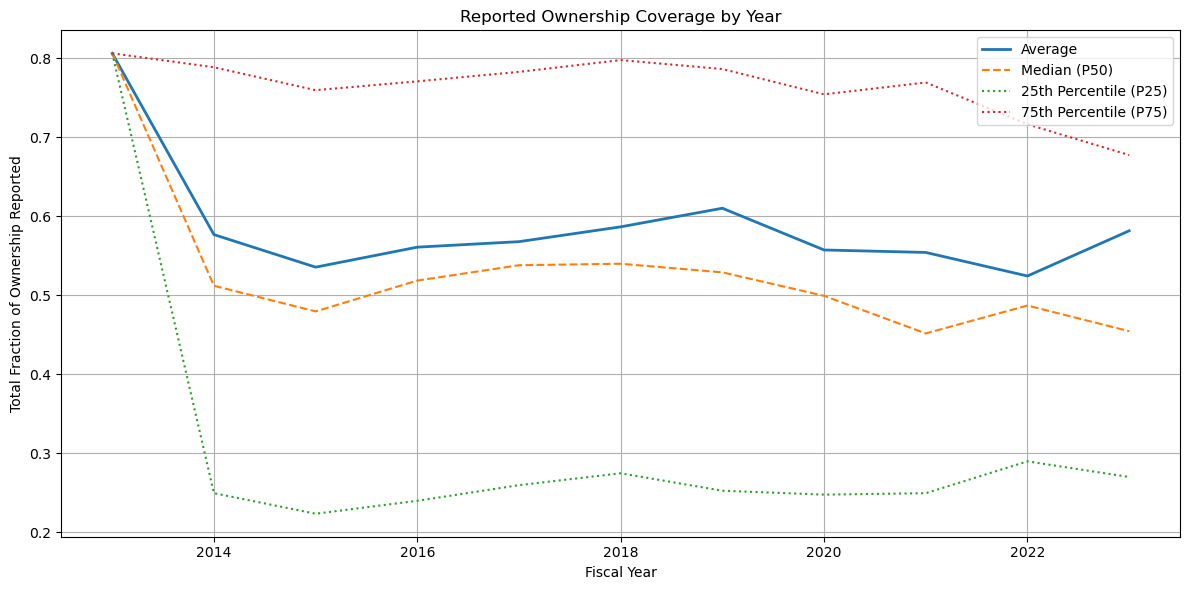

In [2159]:
plt.figure(figsize=(12,6))

# Plot lines
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['Average'], label='Average', linewidth=2)
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['Median'], label='Median (P50)', linestyle='--')
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['P25'], label='25th Percentile (P25)', linestyle=':')
plt.plot(ownership_summary['Fiscal Year'], ownership_summary['P75'], label='75th Percentile (P75)', linestyle=':')

plt.xlabel('Fiscal Year')
plt.ylabel('Total Fraction of Ownership Reported')
plt.title('Reported Ownership Coverage by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 What is the median fraction of the company's ownership that is accounted for by rows in the securities table, at every year? What is the 25th, 75th percentile?##


In [2160]:
# If not already done, compute ownership totals per bank per year
bank_year_ownership = (
    securities_df
    .groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Compute percentiles per year
ownership_percentiles = (
    bank_year_ownership
    .groupby('Fiscal Year')['Total Reported Ownership']
    .agg([
        ('P25', lambda x: x.quantile(0.25)),
        ('P50', 'median'),
        ('P75', lambda x: x.quantile(0.75))
    ])
    .reset_index()
)

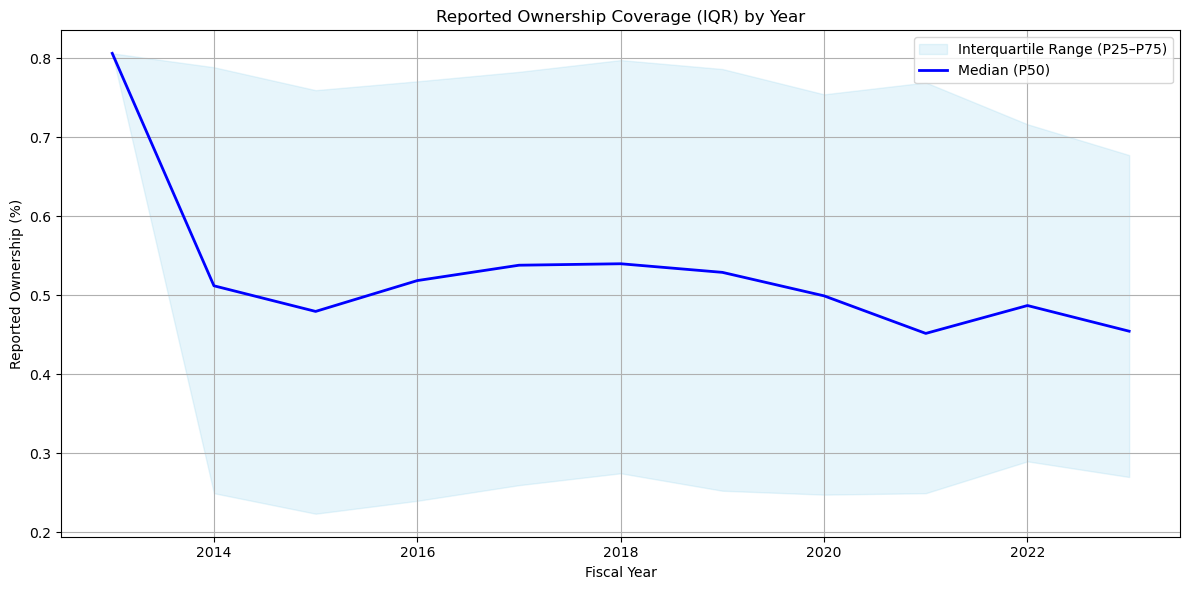

In [2161]:
plt.figure(figsize=(12, 6))

# Ribbon
plt.fill_between(
    ownership_percentiles['Fiscal Year'],
    ownership_percentiles['P25'],
    ownership_percentiles['P75'],
    alpha=0.2,
    color='skyblue',
    label='Interquartile Range (P25–P75)'
)

# Lines
plt.plot(ownership_percentiles['Fiscal Year'], ownership_percentiles['P50'], label='Median (P50)', color='blue', linewidth=2)

plt.xlabel('Fiscal Year')
plt.ylabel('Reported Ownership (%)')
plt.title('Reported Ownership Coverage (IQR) by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


P25 / P50 / P75 Number of Observations per Bank?

In [2162]:
# Count number of observations (rows) per bank
obs_per_bank = securities_df['Bank'].value_counts()

# Compute percentiles
p25 = obs_per_bank.quantile(0.25)
p50 = obs_per_bank.quantile(0.5)
p75 = obs_per_bank.quantile(0.75)

print("Number of Observations per Bank:")
print(f"P25: {p25:.0f}")
print(f"P50 (Median): {p50:.0f}")
print(f"P75: {p75:.0f}")

Number of Observations per Bank:
P25: 6
P50 (Median): 12
P75: 24


Do We Have a Complete Panel from 2016–Present? (Securities Table)

In [2163]:
expected_years = set(range(2014, securities_df['Fiscal Year'].max() + 1))
bank_to_years = securities_df.groupby('Bank')['Fiscal Year'].apply(set)


bank_has_full_panel = bank_to_years.apply(lambda years: expected_years.issubset(years))

# Count how many banks have full panel vs missing data
num_banks = bank_has_full_panel.shape[0]
num_complete = bank_has_full_panel.sum()
num_incomplete = num_banks - num_complete

print(f"\nOut of {num_banks} banks:")
print(f"- {num_complete} banks have a complete panel from 2016–present.")
print(f"- {num_incomplete} banks are missing at least one year.")



Out of 726 banks:
- 5 banks have a complete panel from 2016–present.
- 721 banks are missing at least one year.


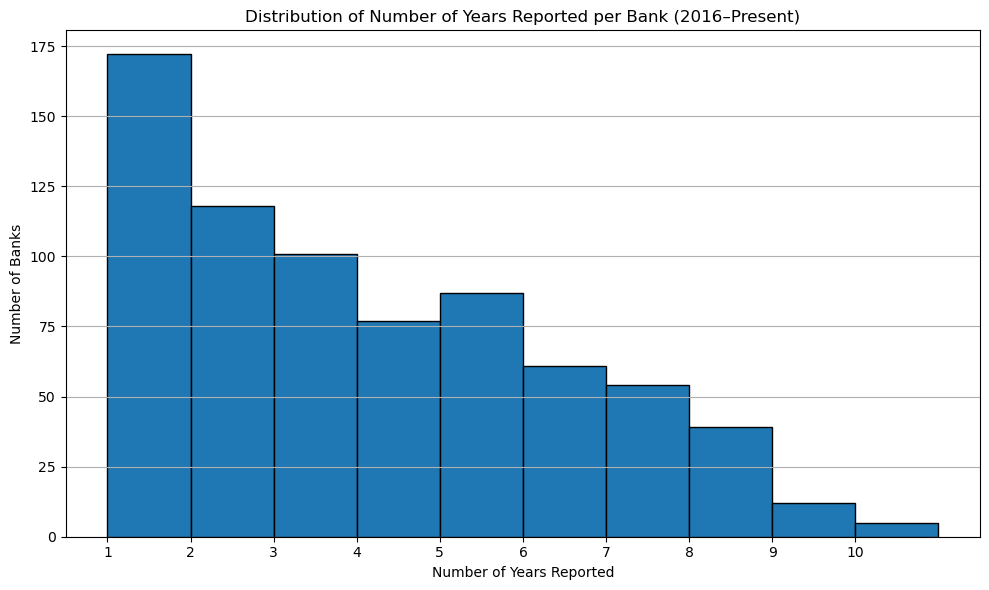

In [2164]:
years_per_bank = (
    securities_df.groupby('Bank')['Fiscal Year']
    .nunique()
)

plt.figure(figsize=(10,6))
plt.hist(years_per_bank, bins=range(1, years_per_bank.max()+2), edgecolor='black')
plt.title("Distribution of Number of Years Reported per Bank (2016–Present)")
plt.xlabel("Number of Years Reported")
plt.ylabel("Number of Banks")
plt.xticks(range(1, years_per_bank.max()+1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [2165]:
# Count number of rows per Fiscal Year
year_counts = securities_df['Fiscal Year'].value_counts().sort_index()

# Show the most frequently reported year
most_common_year = year_counts.idxmax()
most_common_count = year_counts.max()

print(f"The most frequently reported year is {most_common_year} with {most_common_count} observations.")


The most frequently reported year is 2014 with 1600 observations.


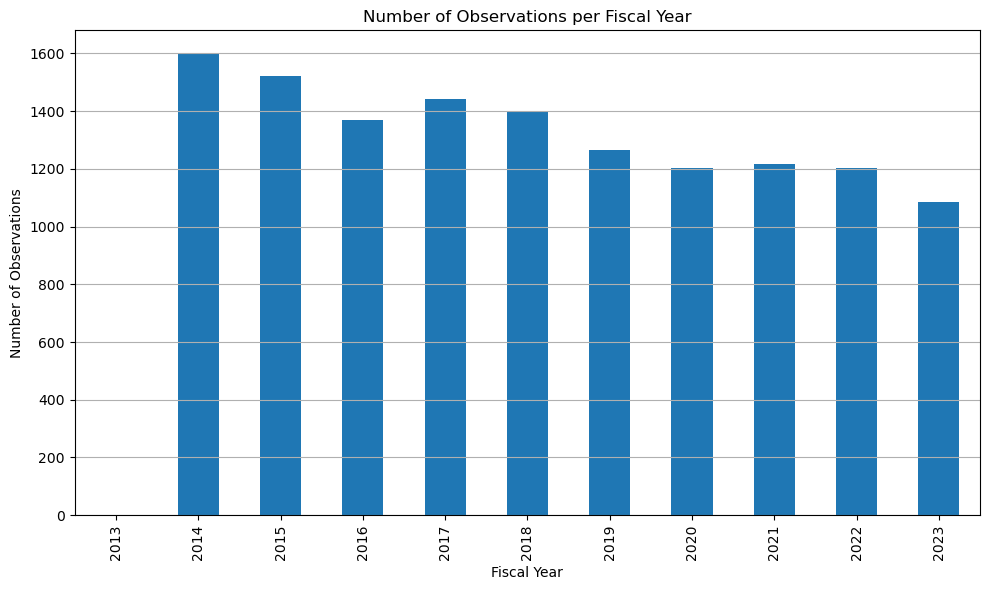

In [2166]:
plt.figure(figsize=(10,6))
year_counts.plot(kind='bar')
plt.title("Number of Observations per Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Observations")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2167]:
years_per_bank = securities_df.groupby('Bank')['Fiscal Year'].nunique()
limited_banks = years_per_bank[years_per_bank <= 2]
print(f"Number of banks with only 1–2 years of data: {len(limited_banks)}")
print("\nExamples:")
print(limited_banks.head(100))  # or .sample(10) for random examples


Number of banks with only 1–2 years of data: 290

Examples:
Bank
a wilberts sons lumber and shingle company    1
abh bancorpinc                                1
amerant florida bancorp inc                   1
american bancsharesred riverinc               1
american enterprise banksharesinc             1
american patriot financial groupinc           2
athens bancshares corporation                 2
athens federal community bank                 2
atlantic coast bank                           1
atlanticnational corporation                  2
avenue financial holdingsinc                  2
bancindependent                               2
bancindependentincorporated                   2
banctenn corp                                 2
bank independent                              1
bank of anguilla                              2
bank of commerce holdingsinc                  1
bank of frankewing                            1
bank of zachary                               1
bankflorida bancorpinc 

What % of the bank does the CEO own at every year?

In [2168]:
ceo_df = merged_df[
    merged_df['Internal Title'].str.contains(r'ceo|chief executive officer|president|executive director', case=False, na=False)
]

# Sum CEO ownership per bank per year
ceo_ownership = (
    ceo_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='CEO Ownership')
)

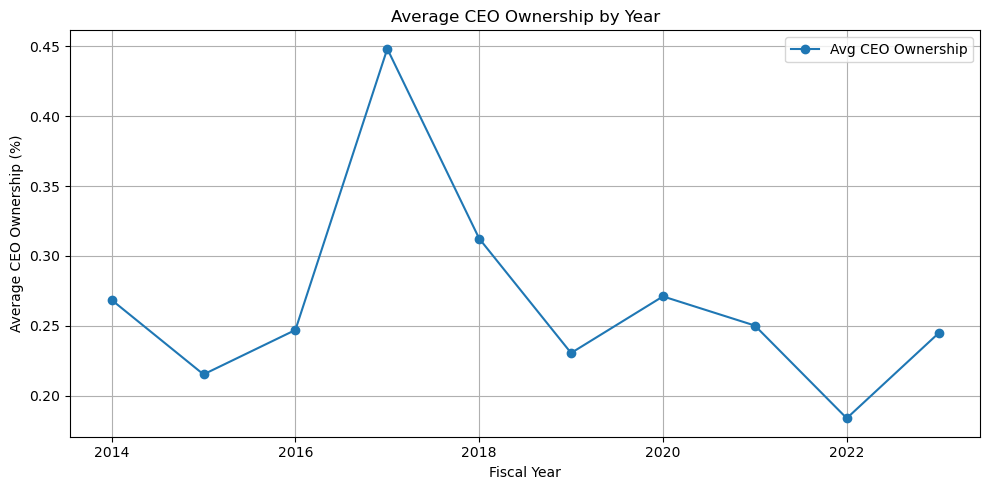

In [2169]:
# Average CEO ownership across all banks each year
avg_ceo_ownership = (
    ceo_ownership.groupby('Fiscal Year')['CEO Ownership']
    .mean()
    .reset_index()
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(avg_ceo_ownership['Fiscal Year'], avg_ceo_ownership['CEO Ownership'], marker='o', label='Avg CEO Ownership')
plt.xlabel('Fiscal Year')
plt.ylabel('Average CEO Ownership (%)')
plt.title('Average CEO Ownership by Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

What % of the bank does the CEO own, as a fraction of the "reported" company ownership?

In [2170]:
# Step 1: Total reported ownership per bank-year
reported_ownership = (
    merged_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='Total Reported Ownership')
)

# Step 2: CEO ownership per bank-year (reuse or recalculate if needed)
ceo_df = merged_df[
    merged_df['Internal Title'].str.contains(r'ceo|chief executive officer|president|executive director', case=False, na=False)
]

ceo_ownership = (
    ceo_df.groupby(['Bank', 'Fiscal Year'])['Percentage of Ownership']
    .sum()
    .reset_index(name='CEO Ownership')
)

# Step 3: Merge the two
ownership_combined = pd.merge(
    reported_ownership,
    ceo_ownership,
    on=['Bank', 'Fiscal Year'],
    how='left'
)

# Fill missing CEO ownership with 0 (if a bank had no CEO listed that year)
ownership_combined['CEO Ownership'] = ownership_combined['CEO Ownership'].fillna(0)

# Step 4: Compute CEO share of reported ownership
ownership_combined['CEO Share of Reported'] = (
    ownership_combined['CEO Ownership'] / ownership_combined['Total Reported Ownership']
)

# Step 5: Optional preview
ownership_combined.head()

,Bank,Fiscal Year,Total Reported Ownership,CEO Ownership,CEO Share of Reported
0,"1st Jackson Bancshare,Inc.",2022,0.5979,0.0,0.0
1,"1st Jackson Bancshares,Inc.",2014,0.4334,0.0,0.0
2,"1st Jackson Bancshares,Inc.",2016,0.4042,0.0,0.0
3,"1st Jackson Bancshares,Inc.",2017,0.4066,0.0,0.0
4,"1st Jackson Bancshares,Inc.",2019,0.3467,0.0,0.0


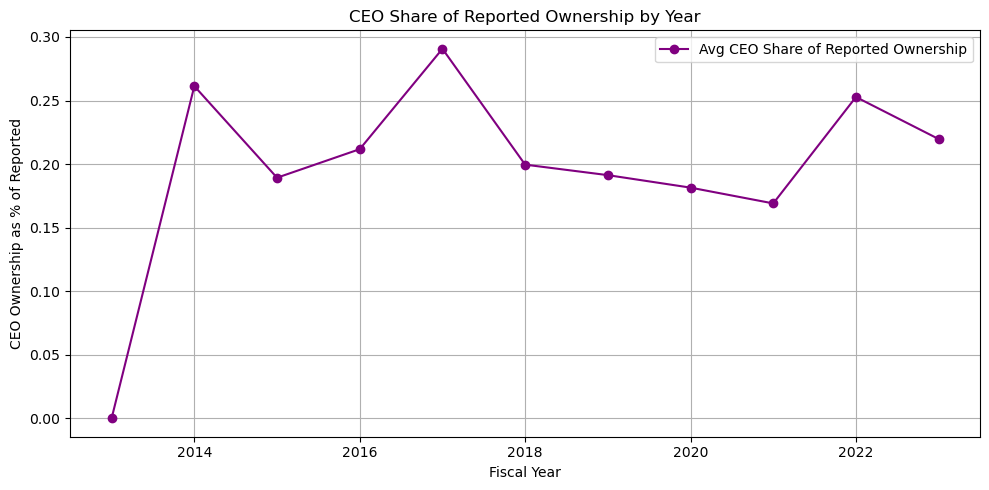

In [2171]:
avg_ceo_share = (
    ownership_combined.groupby('Fiscal Year')['CEO Share of Reported']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(avg_ceo_share['Fiscal Year'], avg_ceo_share['CEO Share of Reported'], marker='o', color='purple', label='Avg CEO Share of Reported Ownership')
plt.xlabel('Fiscal Year')
plt.ylabel('CEO Ownership as % of Reported')
plt.title('CEO Share of Reported Ownership by Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [2172]:
# Step 1: Get banks with only 1–2 years of data
years_per_bank = securities_df.groupby('Bank')['Fiscal Year'].nunique()
limited_banks = years_per_bank[years_per_bank <= 2]

# Step 2: Get the full list of cleaned bank names
unique_banks = securities_df['Bank'].unique()

# Step 3: Loop and print top 5 matches per limited bank
print(f"Number of banks with only 1–2 years of data: {len(limited_banks)}\n")
print("Top 5 fuzzy matches for each bank:\n")

for bank in limited_banks.index:
    matches = process.extract(bank, unique_banks, scorer=fuzz.token_sort_ratio, limit=5)
    
    print(f"\n🔍 Original: {bank}")
    for match_name, score in matches:
        print(f"   - {match_name}  →  score: {score}")

Number of banks with only 1–2 years of data: 290

Top 5 fuzzy matches for each bank:


🔍 Original: a wilberts sons lumber and shingle company
   - a wilberts sons lumber and shingle company  →  score: 100
   - washingtonwilkes holding company  →  score: 59
   - wilson bank holding company  →  score: 58
   - plaquemine bank  trust company  →  score: 56
   - suntrust bank holding company  →  score: 56

🔍 Original: abh bancorpinc
   - abh bancorpinc  →  score: 100
   - anchor bancorpinc  →  score: 84
   - homebancorpinc  →  score: 79
   - american bancorpinc  →  score: 73
   - cnb bancorpinc  →  score: 71

🔍 Original: amerant florida bancorp inc
   - amerant florida bancorp inc  →  score: 100
   - american bancorpinc  →  score: 74
   - first american bancorp  →  score: 69
   - first america bancorp  →  score: 67
   - marine bancorp of floridainc  →  score: 65

🔍 Original: american bancsharesred riverinc
   - american bancsharesred riverinc  →  score: 100
   - american bancsharesinc  →  sc

Check how many fiscal years match independently 

In [2173]:
# Compare Fiscal Year overlap
fiscal_year_overlap = set(insiders_df['Fiscal Year']) & set(securities_df['Fiscal Year'])
print(f"Matching Fiscal Years: {len(fiscal_year_overlap)} / {insiders_df['Fiscal Year'].nunique()}")

# Check how many insiders have matching Fiscal Years in securities
insiders_with_matching_years = insiders_df[insiders_df['Fiscal Year'].isin(fiscal_year_overlap)]
print(f"Insiders with matching fiscal years: {len(insiders_with_matching_years)}")


Matching Fiscal Years: 0 / 52
Insiders with matching fiscal years: 0


In [2174]:
print("Insiders Fiscal Year dtype:", insiders_df['Fiscal Year'].dtype)
print("Securities Fiscal Year dtype:", securities_df['Fiscal Year'].dtype)


Insiders Fiscal Year dtype: object
Securities Fiscal Year dtype: int64


In [2175]:
insiders_df['Fiscal Year'] = (
    insiders_df['Fiscal Year']
    .astype(str)
    .str.replace(',', '')
    .str.strip()
    .replace('', pd.NA)  # Replace empty strings with NA
)

insiders_df['Fiscal Year'] = pd.to_numeric(insiders_df['Fiscal Year'], errors='coerce')
# Optional: drop or fill missing
insiders_df.dropna(subset=['Fiscal Year'], inplace=True)
insiders_df['Fiscal Year'] = insiders_df['Fiscal Year'].astype(int)



In [2176]:
# Compare Fiscal Year overlap
fiscal_year_overlap = set(insiders_df['Fiscal Year']) & set(securities_df['Fiscal Year'])
print(f"Matching Fiscal Years: {len(fiscal_year_overlap)} / {insiders_df['Fiscal Year'].nunique()}")

# Check how many insiders have matching Fiscal Years in securities
insiders_with_matching_years = insiders_df[insiders_df['Fiscal Year'].isin(fiscal_year_overlap)]
print(f"Insiders with matching fiscal years: {len(insiders_with_matching_years)}")


Matching Fiscal Years: 11 / 13
Insiders with matching fiscal years: 57822


In [2177]:
# Merge on Person ↔ Owner Name and Fiscal Year
merged_df = pd.merge(
    insiders_df,
    securities_df,
    left_on=['Person', 'Fiscal Year'],
    right_on=['Owner Name', 'Fiscal Year'],
    how='inner'
)

# Drop unnecessary columns
merged_df.drop(columns=['Town', 'Occupation', 'Affiliation', 'External Title', 'Owner Name'], inplace=True, errors='ignore')

# Optional renaming for clarity
merged_df.rename(columns={
    'Bank_x': 'Bank',
    'RSSD_ID_x': 'RSSD_ID',
}, inplace=True)

merged_df.drop(columns=['Bank_y', 'RSSD_ID_y'], inplace=True, errors='ignore')

# Optional: reset index
merged_df.reset_index(drop=True, inplace=True)

In [2178]:
print(len(merged_df))

11778


In [2179]:
from fuzzywuzzy import process

# get unique names from each dataset
insider_names = insiders_df['Person'].unique()
securities_names = securities_df['Owner Name'].unique()

# sample: Fuzzy match a few names from insiders to securities
for name in insider_names[:10]:  # or pick a random sample
    matches = process.extract(name, securities_names, limit=3)
    print(f"{name} → {matches}")


jimmy d. blevins → [('jimmy d. blevins', 100), ('noel m dowling family trust f/b/o shirley d. mccrary', 86), ('deloach,dennis r. jr. trustee u/t/d 3/18/99', 86)]
shelby carr → [('shelby carr', 100), ('william henry carr', 86), ('jerry newman carr', 86)]
billy duck → [('billy g. kilpatrick', 86), ('billy g. kilpatrick and georgia kilpatrick', 86), ('billy g. kilpatrick and', 86)]
james s. mcginty → [('james s. mcginty', 100), ('richard s. ingham revocable trust', 86), ('richard s. ingham,revocable trust', 86)]
pam m. parker → [('pam m. parker', 100), ('noel m dowling family trust f/b/o n. mitchell dowling,jr.', 86), ('noel m dowling family trust f/b/o shirley d. mccrary', 86)]
j. d. shrader,jr. → [('marguerite j gaskins trust', 86), ('marguerite j. gaskins trust', 86), ('e. l. spencer,jr. estate', 86)]
charles r. holder → [('charles robert holder', 88), ('deloach,dennis r. jr. trustee u/t/d 3/18/99', 86), ('deloach,dennis r. jr. & faye m. tbte', 86)]
jeremy washburn → [('elizabeth barre

In [2180]:
# First filter down to insiders with matching Fiscal Years
insiders_filtered = insiders_df[insiders_df['Fiscal Year'].isin(securities_df['Fiscal Year'])]

# Which of those names are not in securities?
non_matching_names = ~insiders_filtered['Person'].isin(securities_df['Owner Name'].unique())
print(f"Non-matching names after filtering by Fiscal Year: {insiders_filtered[non_matching_names]['Person'].nunique()}")


Non-matching names after filtering by Fiscal Year: 7881


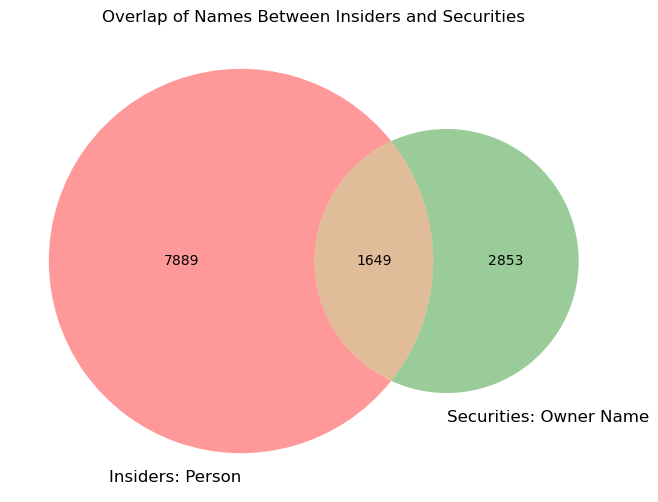

In [2181]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

set1 = set(insiders_df['Person'].unique())
set2 = set(securities_df['Owner Name'].unique())

plt.figure(figsize=(8, 6))
venn2([set1, set2], set_labels=('Insiders: Person', 'Securities: Owner Name'))
plt.title("Overlap of Names Between Insiders and Securities")
plt.show()


In [2182]:
common_years = set(insiders_df['Fiscal Year']) & set(securities_df['Fiscal Year'])

insiders_filtered = insiders_df[insiders_df['Fiscal Year'].isin(common_years)]
securities_filtered = securities_df[securities_df['Fiscal Year'].isin(common_years)]

# Exact name matches
matched_names = insiders_filtered['Person'].isin(securities_filtered['Owner Name'])
num_matched = matched_names.sum()
total = len(insiders_filtered)

print(f"Exact name matches: {num_matched} / {total} ({num_matched/total:.2%})")


Exact name matches: 13168 / 57822 (22.77%)


In [2183]:
print(len(securities_df))
print(len(insider_df))
print(len(merged_df))

13305
58373
11778


###S&P Q IP Data#####
#######

In [2184]:
insiders_df_s3 = pd.read_csv("/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/all_insiders_s3.csv")

In [2185]:
insiders_df_s3.head(1)

,Bank,Internal Title,Person,External Title,Affiliation,Fiscal Year,Occupation,Percentage of Voting Shares,RSSD_ID,Percentage of Voting Shares in Subsidiaries,URL_Bank_Name,Table Presence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215 Holding Co._Y-6_2024-12-31T00_00_00_English,none


In [2186]:
insiders_df_s3["Internal Title"] = insiders_df_s3["Internal Title"].str.replace('"', '', regex=False)
insiders_df_s3["Person"] = insiders_df_s3["Person"].str.replace('"', '', regex=False)
insiders_df_s3["Affiliation"] = insiders_df_s3["Affiliation"].str.replace('"', '', regex=False)
insiders_df_s3["Occupation"] = insiders_df_s3["Occupation"].str.replace('"', '', regex=False)
insiders_df_s3["Bank"] = insiders_df_s3["Bank"].str.replace('"', '', regex=False)
insiders_df_s3.head(10)

,Bank,Internal Title,Person,External Title,Affiliation,Fiscal Year,Occupation,Percentage of Voting Shares,RSSD_ID,Percentage of Voting Shares in Subsidiaries,URL_Bank_Name,Table Presence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215 Holding Co._Y-6_2024-12-31T00_00_00_English,none
1,"ABDO INVESTMENT,INC.","Director,President",Jay M. Abdo,President,Rivers Ridge,2023,Retired CPA,14.286%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
2,"ABDO INVESTMENT,INC.",Director,John N. Abdo,Partner,"Abdo,LLP",2023,CPA,14.286%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
3,"ABDO INVESTMENT,INC.",Director,James A. Abdo,VP-Sales,Abdo Publishing Co.,2023,VP Sales,14.286%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
4,"ABDO INVESTMENT,INC.",Director,Paul J. Abdo,Chief Editor,Abdo Publishing Co.,2023,Chief Editor,14.286%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
5,"ABDO INVESTMENT,INC.",Director,Melody C. Borth,Retired,NaN,2023,VP Finance,14.286%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
6,"ABDO INVESTMENT,INC.",Director,Lynne M. Abdo,Retired,NaN,2023,Sales-East Coast,14.285%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
7,"ABDO INVESTMENT,INC.",Director,Jill M. Hanson,CEO,Abdo Publishing Co.,2023,CEO,14.285%,NaN,NaN,"ABDO Investments, Inc._Y-6_2023-12-31T00_00_00...",both
8,AFNB Holdings INC,Chairman & CEO Director,"Wu,Wen Lung (Wu","Henry)"",Chairman""",American First National Bank,2023,Business Entrepreneur,20.6792%,NaN,NaN,"AFNB Holdings, Inc._Y-6_2023-12-31T00_00_00_En...",both
9,AFNB Holdings INC,Chairman & CEO Director,"Wu,Wen Lung (Wu","Henry)"",President""",Hugesen Polymers USA L.P.,2023,Business Entrepreneur,20.6792%,NaN,NaN,"AFNB Holdings, Inc._Y-6_2023-12-31T00_00_00_En...",both


In [2187]:
# insiders_df_s3["URL_Bank_Name"] = insiders_df_s3["URL_Bank_Name"].str.split("_Y-6_").str[0]

import numpy as np

insiders_df_s3["URL_Bank_Name"] = np.where(
    insiders_df_s3["Table Presence"].isin(["none", "insiders", "securities"]),
    insiders_df_s3["URL_Bank_Name"],
    insiders_df_s3["URL_Bank_Name"].str.split("_Y-6_").str[0]
)

insiders_df_s3 = insiders_df_s3.rename(columns={'Bank': 'Bank_y', 
                                                'URL_Bank_Name': 'Bank', 'Percentage of Voting Shares': 'Percentage of Voting Shares in HC'})
insiders_df_s3.head(100)


,Bank_y,Internal Title,Person,External Title,Affiliation,Fiscal Year,Occupation,Percentage of Voting Shares in HC,RSSD_ID,Percentage of Voting Shares in Subsidiaries,Bank,Table Presence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215 Holding Co._Y-6_2024-12-31T00_00_00_English,none
1,"ABDO INVESTMENT,INC.","Director,President",Jay M. Abdo,President,Rivers Ridge,2023,Retired CPA,14.286%,NaN,NaN,"ABDO Investments, Inc.",both
2,"ABDO INVESTMENT,INC.",Director,John N. Abdo,Partner,"Abdo,LLP",2023,CPA,14.286%,NaN,NaN,"ABDO Investments, Inc.",both
3,"ABDO INVESTMENT,INC.",Director,James A. Abdo,VP-Sales,Abdo Publishing Co.,2023,VP Sales,14.286%,NaN,NaN,"ABDO Investments, Inc.",both
4,"ABDO INVESTMENT,INC.",Director,Paul J. Abdo,Chief Editor,Abdo Publishing Co.,2023,Chief Editor,14.286%,NaN,NaN,"ABDO Investments, Inc.",both
5,"ABDO INVESTMENT,INC.",Director,Melody C. Borth,Retired,NaN,2023,VP Finance,14.286%,NaN,NaN,"ABDO Investments, Inc.",both
6,"ABDO INVESTMENT,INC.",Director,Lynne M. Abdo,Retired,NaN,2023,Sales-East Coast,14.285%,NaN,NaN,"ABDO Investments, Inc.",both
7,"ABDO INVESTMENT,INC.",Director,Jill M. Hanson,CEO,Abdo Publishing Co.,2023,CEO,14.285%,NaN,NaN,"ABDO Investments, Inc.",both
8,AFNB Holdings INC,Chairman & CEO Director,"Wu,Wen Lung (Wu","Henry)"",Chairman""",American First National Bank,2023,Business Entrepreneur,20.6792%,NaN,NaN,"AFNB Holdings, Inc.",both
9,AFNB Holdings INC,Chairman & CEO Director,"Wu,Wen Lung (Wu","Henry)"",President""",Hugesen Polymers USA L.P.,2023,Business Entrepreneur,20.6792%,NaN,NaN,"AFNB Holdings, Inc.",both


In [2188]:
file_path = '/Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/insiders_df_s3.csv'
insiders_df_s3.to_csv(file_path, index=False)

print(f"CSV file saved at: {file_path}")


CSV file saved at: /Users/nashlaturcios/Desktop/FedDataScraper/fed-data/CSV_tables/insiders_df_s3.csv
